[*********************100%%**********************]  1 of 1 completed

Mean Price: 11.616807917694548
Variance Price: 1.126901707546731


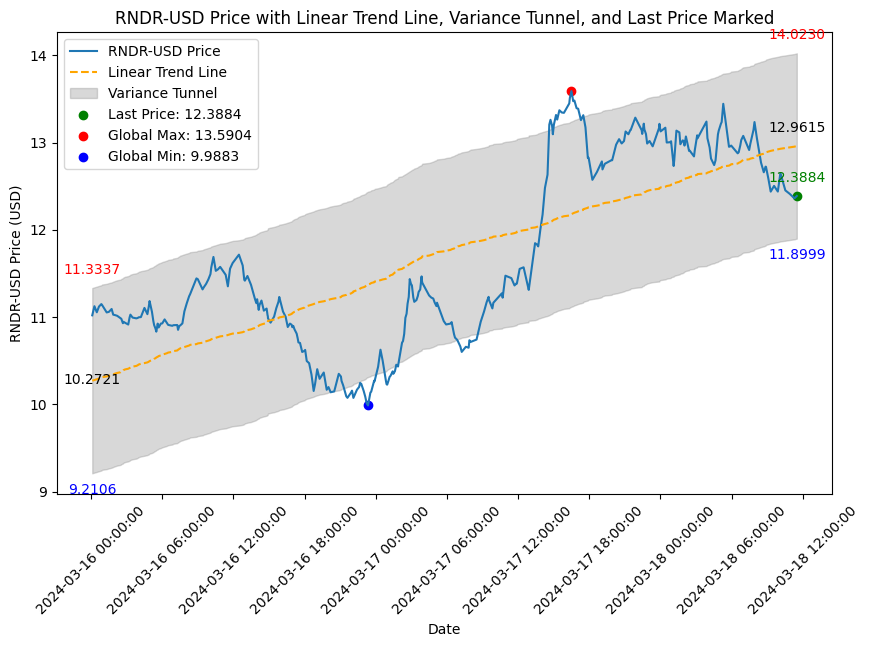

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import yfinance as yf

# Step 1: Download CRV's data for the last 1 week
ticker = "RNDR-USD"
data = yf.download(ticker, start="2024-03-16", end="2024-03-19", interval="1m")
data = data["Close"]

# Step 2: Plot the last 1-week chart of ticker with this data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label=f'{ticker} Price')
plt.title(f'{ticker} Price - Last 1 Week')
plt.xlabel('Date')
plt.ylabel(f'{ticker} Price (USD)')
plt.legend()

# Step 3: Calculate the mean and variance of this data
mean_price = data.mean()
variance_price = data.var()

print(f'Mean Price: {mean_price}')
print(f'Variance Price: {variance_price}')

# Step 4: Fit a linear trend line to this curve
X = np.arange(len(data)).reshape(-1, 1)
y = data.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

# Step 5: Create a tunnel of variance around this fitted line
tunnel_upper = model.predict(X) + np.sqrt(variance_price)
tunnel_lower = model.predict(X) - np.sqrt(variance_price)

# Find global maximum and minimum
global_max_index = np.argmax(data)
global_min_index = np.argmin(data)

# Plot the results
plt.plot(data.index, model.predict(X), label='Linear Trend Line', linestyle='--', color='orange')
plt.fill_between(data.index, tunnel_upper.flatten(), tunnel_lower.flatten(), color='gray', alpha=0.3, label='Variance Tunnel')

# Add price annotations on the variance tunnel
for i, date in enumerate(data.index):
    if i % (24 * 60 * 1.5) == 0:  # Display every week
        plt.annotate(f'{tunnel_upper[i][0]:.4f}', (date, tunnel_upper[i][0]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
        plt.annotate(f'{tunnel_lower[i][0]:.4f}', (date, tunnel_lower[i][0]), textcoords="offset points", xytext=(0,-15), ha='center', color='blue')
        plt.annotate(f'{model.predict(X)[i][0]:.4f}', (date, model.predict(X)[i][0]), textcoords="offset points", xytext=(0,-2.5), ha='center', color='black')

# Mark the last price
last_price = data.iloc[-1]
plt.scatter(data.index[-1], last_price, color='green', label=f'Last Price: {last_price:.4f}')
plt.annotate(f'{last_price:.4f}', (data.index[-1], last_price), textcoords="offset points", xytext=(0,10), ha='center', color='green')
plt.annotate(f'{model.predict(X)[-1][0]:.4f}', (data.index[-1], model.predict(X)[-1][0]), textcoords="offset points", xytext=(0,10), ha='center', color='black')
plt.annotate(f'{tunnel_upper[-1][0]:.4f}', (date, tunnel_upper[-1][0]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f'{tunnel_lower[-1][0]:.4f}', (date, tunnel_lower[-1][0]), textcoords="offset points", xytext=(0,-15), ha='center', color='blue')


# Annotate global maximum and minimum prices
plt.scatter(data.index[global_max_index], data.iloc[global_max_index], color='red', label=f'Global Max: {data.iloc[global_max_index]:.4f}')
plt.scatter(data.index[global_min_index], data.iloc[global_min_index], color='blue', label=f'Global Min: {data.iloc[global_min_index]:.4f}')

plt.title(f'{ticker} Price with Linear Trend Line, Variance Tunnel, and Last Price Marked')
plt.xlabel('Date')
plt.ylabel(f'{ticker} Price (USD)')

# Add better date formatting
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))

plt.legend()
plt.show()